In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from sklearn.decomposition import PCA

from sklearn import datasets



%matplotlib inline

In [3]:
shoot = pd.read_csv("NYPD_Shooting_Incident_Data__Year_To_Date_.csv", parse_dates = ["OCCUR_DATE", "OCCUR_TIME"])
shoot

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,203083804,2019-09-30,2019-12-10 13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
1,203083804,2019-09-30,2019-12-10 13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
2,203041425,2019-09-29,2019-12-10 23:15:00,BRONX,52,0.0,NaN,False,25-44,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,1010668,253614,40.862755,-73.904493
3,203041429,2019-09-29,2019-12-10 18:30:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,962585,165738,40.621571,-74.078043
4,203041424,2019-09-29,2019-12-10 00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917
5,203041430,2019-09-28,2019-12-10 01:17:00,BRONX,42,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK,1012860,244801,40.838559,-73.896606
6,203042901,2019-09-27,2019-12-10 23:29:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,45-64,M,BLACK,1019084,183993,40.671635,-73.874428
7,203041427,2019-09-27,2019-12-10 21:45:00,QUEENS,101,0.0,NaN,False,18-24,M,BLACK,25-44,F,BLACK,1051162,155661,40.593685,-73.759070
8,203041423,2019-09-27,2019-12-10 20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,F,BLACK,1013031,182526,40.667630,-73.896254
9,203041423,2019-09-27,2019-12-10 20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1013031,182526,40.667630,-73.896254


In [4]:
shoot.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,7.490000e+02,749.000000,748.000000,7.490000e+02,749.000000,749.000000,749.000000
mean,1.980070e+08,65.907877,0.430481,1.010338e+06,208237.809079,40.738192,-73.905857
std,3.162255e+06,28.495253,0.819267,1.795087e+04,31100.912145,0.085373,0.064725
min,1.917100e+08,1.000000,0.000000,9.367220e+05,148311.000000,40.573763,-74.171252
25%,1.953973e+08,43.000000,0.000000,1.000486e+06,183148.000000,40.669310,-73.941409
50%,1.982555e+08,69.000000,0.000000,1.008224e+06,195411.000000,40.702846,-73.913563
75%,2.006683e+08,81.000000,0.000000,1.017307e+06,238673.000000,40.821736,-73.880844
max,2.030838e+08,122.000000,2.000000,1.058211e+06,263946.000000,40.891040,-73.733248


In [5]:
shoot.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,203083804,2019-09-30,2019-12-10 13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
1,203083804,2019-09-30,2019-12-10 13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
2,203041425,2019-09-29,2019-12-10 23:15:00,BRONX,52,0.0,NaN,False,25-44,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,1010668,253614,40.862755,-73.904493
3,203041429,2019-09-29,2019-12-10 18:30:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,962585,165738,40.621571,-74.078043
4,203041424,2019-09-29,2019-12-10 00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917


In [53]:
shoot_new = pd.get_dummies(shoot, columns = ["VIC_SEX","STATISTICAL_MURDER_FLAG", "PERP_SEX", "VIC_AGE_GROUP", ], drop_first = True)
shoot_new.head(10)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,PERP_AGE_GROUP,PERP_RACE,VIC_RACE,...,VIC_SEX_M,VIC_SEX_U,STATISTICAL_MURDER_FLAG_True,PERP_SEX_M,PERP_SEX_U,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18,VIC_AGE_GROUP_UNKNOWN
0,203083804,2019-09-30,2019-12-10 13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,18-24,BLACK,BLACK,...,1,0,0,1,0,0,0,0,0,0
1,203083804,2019-09-30,2019-12-10 13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,18-24,BLACK,BLACK,...,1,0,1,1,0,0,0,0,0,0
2,203041425,2019-09-29,2019-12-10 23:15:00,BRONX,52,0.0,NaN,25-44,WHITE HISPANIC,BLACK HISPANIC,...,1,0,0,1,0,0,0,0,0,0
3,203041429,2019-09-29,2019-12-10 18:30:00,STATEN ISLAND,120,0.0,NaN,NaN,NaN,BLACK,...,1,0,0,0,0,0,0,0,1,0
4,203041424,2019-09-29,2019-12-10 00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,25-44,BLACK,WHITE,...,1,0,1,1,0,1,0,0,0,0
5,203041430,2019-09-28,2019-12-10 01:17:00,BRONX,42,0.0,NaN,NaN,NaN,BLACK,...,1,0,1,0,0,0,0,0,0,0
6,203042901,2019-09-27,2019-12-10 23:29:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,NaN,NaN,BLACK,...,1,0,0,0,0,0,1,0,0,0
7,203041427,2019-09-27,2019-12-10 21:45:00,QUEENS,101,0.0,NaN,18-24,BLACK,BLACK,...,0,0,0,1,0,1,0,0,0,0
8,203041423,2019-09-27,2019-12-10 20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,NaN,NaN,BLACK,...,0,0,0,0,0,1,0,0,0,0
9,203041423,2019-09-27,2019-12-10 20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,NaN,NaN,BLACK,...,1,0,0,0,0,0,0,0,0,0


Text(0,0.5,'# of shootings')

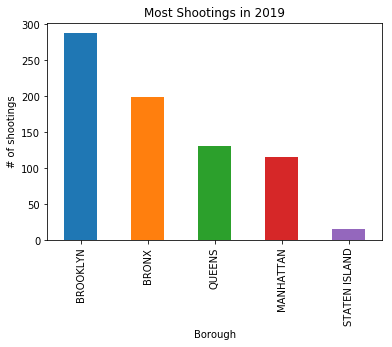

In [24]:
boro_shoot = shoot["BORO"].value_counts()
boro_shoot.plot.bar()
plt.title("Most Shootings in 2019")
plt.xlabel("Borough")
plt.ylabel("# of shootings")

Text(0,0.5,'# of Shootings')

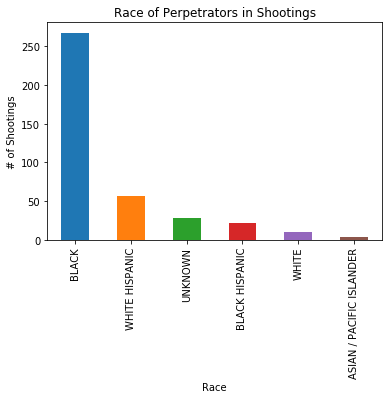

In [31]:
race_shoot = shoot["PERP_RACE"].value_counts()
race_shoot.plot.bar()
plt.title("Race of Perpetrators in Shootings")
plt.xlabel("Race")
plt.ylabel("# of Shootings")

Text(0,0.5,'# of Shootings')

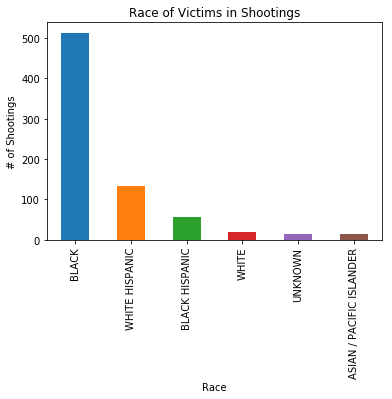

In [30]:
race1_shoot = shoot["VIC_RACE"].value_counts()
race1_shoot.plot.bar()
plt.title("Race of Victims in Shootings")
plt.xlabel("Race")
plt.ylabel("# of Shootings")

In [64]:
fp = 'geo_export_58b25928–032c-45c8-a41f-8345f112f4d4.shp'
map_df = gpd.read_file(fp)

NameError: name 'gpd' is not defined

Text(0,0.5,'# of incidents')

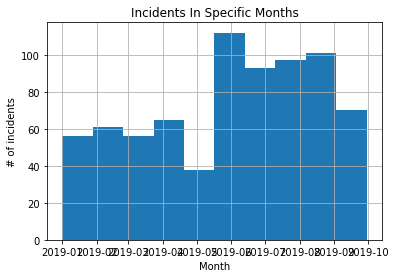

In [42]:
shoot["OCCUR_DATE"].hist()
plt.title("Incidents In Specific Months")
plt.xlabel("Month")
plt.ylabel("# of incidents")

In [20]:
shoot.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
744,191851037,2019-01-03,2019-12-10 21:00:00,BRONX,49,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1024472,256716,40.871217,-73.854569
745,191790873,2019-01-02,2019-12-10 13:34:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,WHITE HISPANIC,999653,193642,40.698174,-73.944453
746,191739125,2019-01-01,2019-12-10 05:40:00,BROOKLYN,88,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,991148,192533,40.695141,-73.975126
747,191709964,2019-01-01,2019-12-10 04:26:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,True,NaN,NaN,NaN,25-44,M,BLACK,1021382,181825,40.665675,-73.866156
748,191739126,2019-01-01,2019-12-10 02:19:00,BRONX,46,2.0,MULTI DWELL - APT BUILD,False,25-44,M,BLACK HISPANIC,25-44,M,BLACK,1013072,251276,40.856331,-73.895812


Text(0,0.5,'Age Group of 25-44')

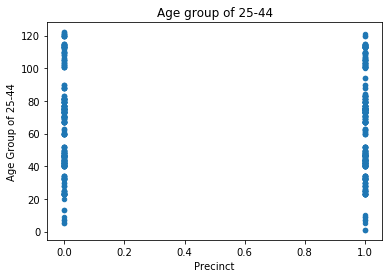

In [58]:
shoot_new.plot.scatter(x = "VIC_AGE_GROUP_25-44", y ="")
plt.title("Age group of 25-44")
plt.xlabel("Precinct")
plt.ylabel("Age Group of 25-44")

Text(0,0.5,'Age Group of Less Than 18')

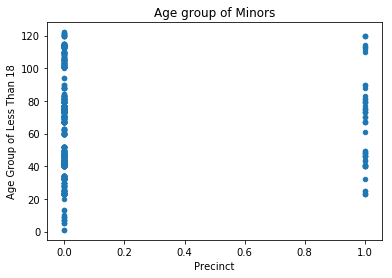

In [63]:
shoot_new.plot.scatter(x = "VIC_AGE_GROUP_<18", y ="PRECINCT")
plt.title("Age group of Minors")
plt.xlabel("Precinct")
plt.ylabel("Age Group of Less Than 18")

In [29]:
a = shoot["STATISTICAL_MURDER_FLAG"].value_counts()
a.hist.plot()

AttributeError: 'function' object has no attribute 'plot'

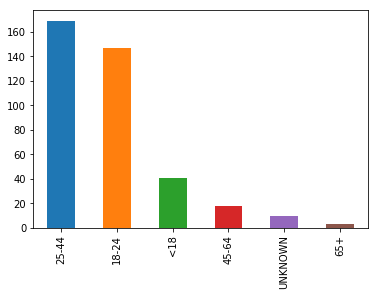

In [12]:
shoot_vic = shoot["VIC_AGE_GROUP"].value_counts()
shoot_perp = shoot["PERP_AGE_GROUP"].value_counts()
shoot_perp.plot.bar()

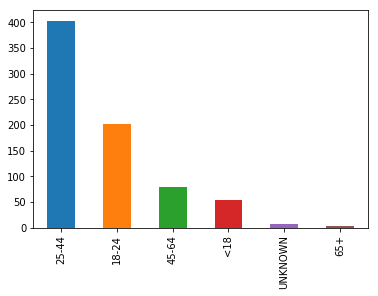

In [14]:
shoot_vic.plot.bar()

In [13]:
shoot.plot.scatter(x = "OCCUR_DATE", y = "OCCUR_TIME")

ValueError: scatter requires x column to be numeric

In [27]:
lm = smf.ols("PERP_SEX_M ~ VIC_SEX_M", data = shoot_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PERP_SEX_M   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07812
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.780
Time:                        01:02:09   Log-Likelihood:                -543.55
No. Observations:                 749   AIC:                             1091.
Df Residuals:                     747   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4800      0.058      8.304      0.000       0.367       0.593
VIC_SEX_M      0.0170      0.061      0.280      0.780      -0.103       0.137
==============================================================================
Omnibus:                     2913.156   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.781
Skew:                           0.019   Prob(JB):                     8.02e-28
Kurtosis:                       1.001   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Linear Regression of Shooting Data')

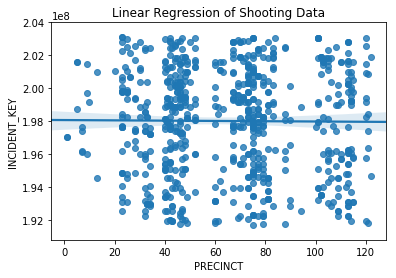

In [65]:
sns.regplot(x = "PRECINCT", y = "INCIDENT_KEY", data = shoot, fit_reg = True)
plt.title("Linear Regression of Shooting Data")

ValueError: max must be larger than min in range parameter.

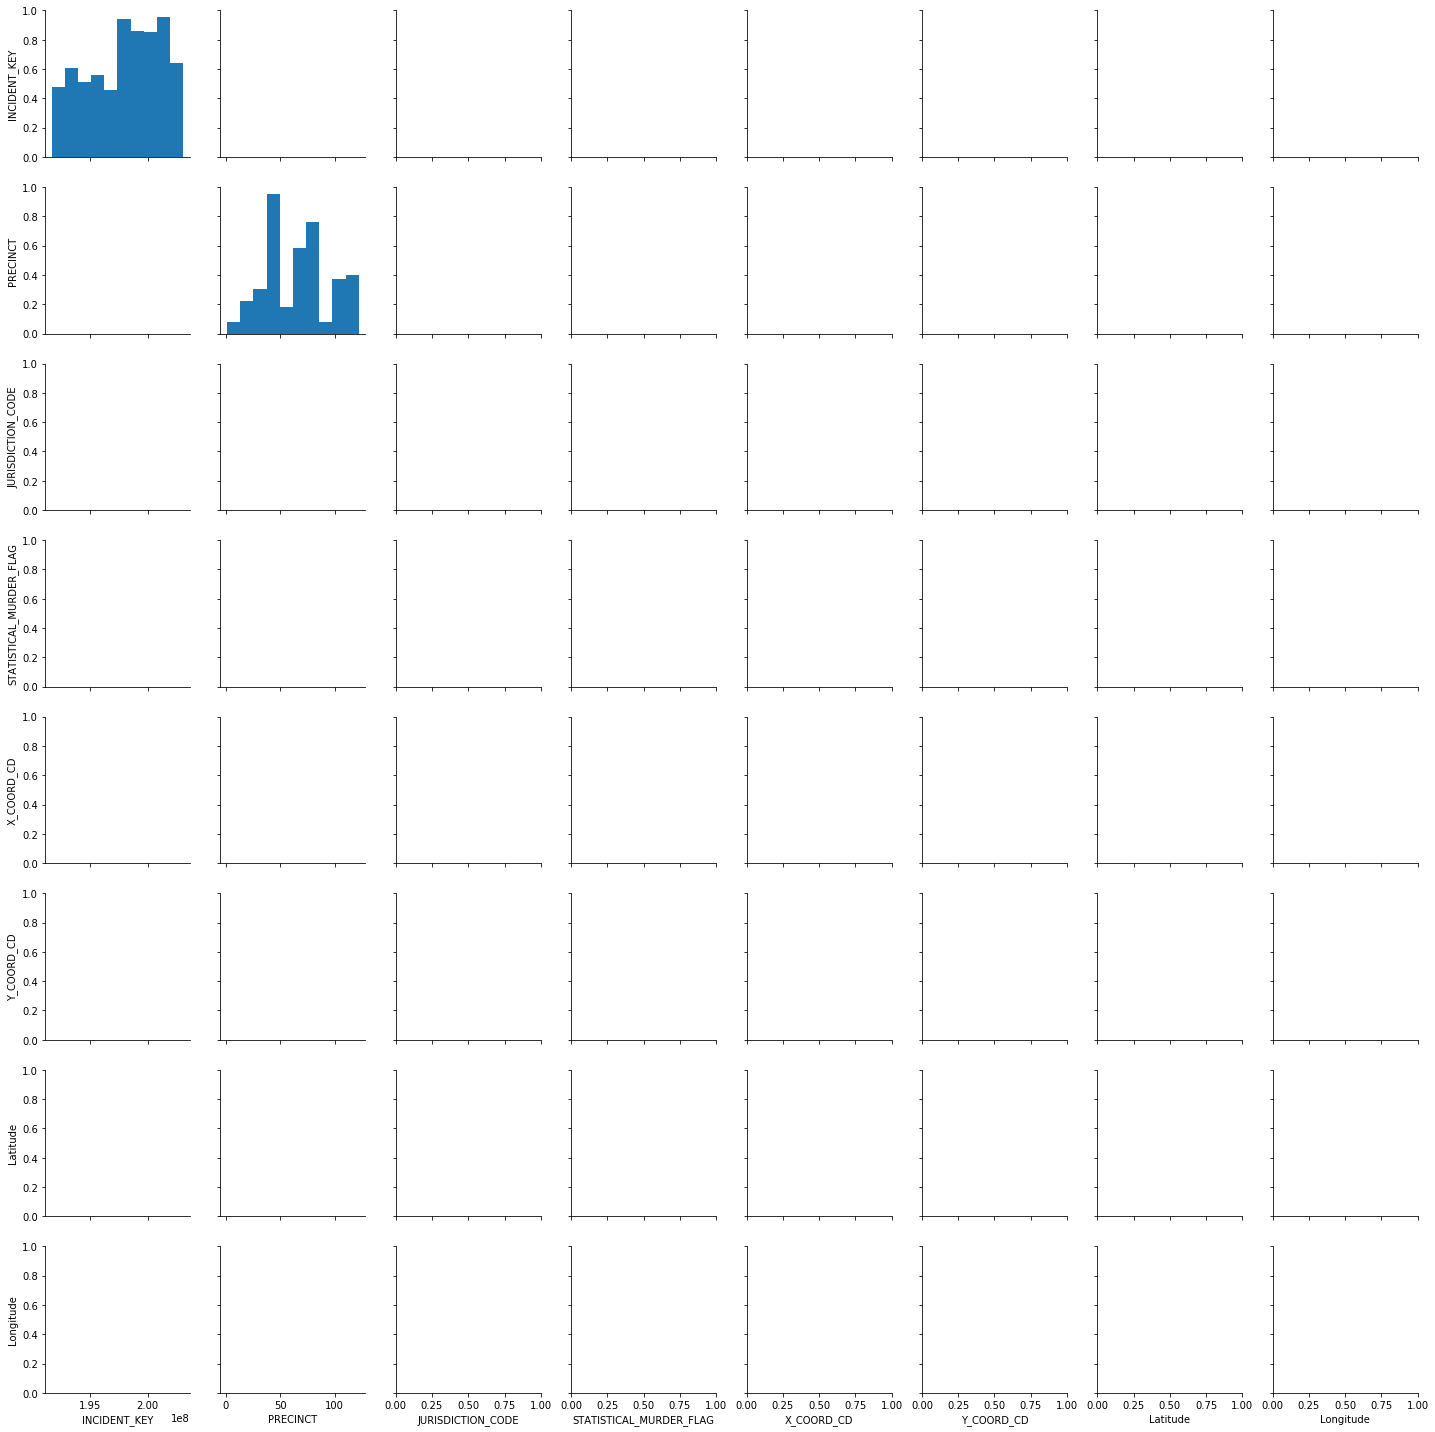

In [18]:
sns.pairplot(shoot)

In [19]:
shoot.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,7.490000e+02,749.000000,748.000000,7.490000e+02,749.000000,749.000000,749.000000
mean,1.980070e+08,65.907877,0.430481,1.010338e+06,208237.809079,40.738192,-73.905857
std,3.162255e+06,28.495253,0.819267,1.795087e+04,31100.912145,0.085373,0.064725
min,1.917100e+08,1.000000,0.000000,9.367220e+05,148311.000000,40.573763,-74.171252
25%,1.953973e+08,43.000000,0.000000,1.000486e+06,183148.000000,40.669310,-73.941409
50%,1.982555e+08,69.000000,0.000000,1.008224e+06,195411.000000,40.702846,-73.913563
75%,2.006683e+08,81.000000,0.000000,1.017307e+06,238673.000000,40.821736,-73.880844
max,2.030838e+08,122.000000,2.000000,1.058211e+06,263946.000000,40.891040,-73.733248


In [81]:
shoot_new.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,PERP_AGE_GROUP,PERP_RACE,VIC_RACE,...,VIC_SEX_M,VIC_SEX_U,STATISTICAL_MURDER_FLAG_True,PERP_SEX_M,PERP_SEX_U,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18,VIC_AGE_GROUP_UNKNOWN
744,191851037,2019-01-03,2019-12-10 21:00:00,BRONX,49,0.0,NaN,NaN,NaN,BLACK,...,1,0,0,0,0,1,0,0,0,0
745,191790873,2019-01-02,2019-12-10 13:34:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,NaN,NaN,WHITE HISPANIC,...,1,0,0,0,0,1,0,0,0,0
746,191739125,2019-01-01,2019-12-10 05:40:00,BROOKLYN,88,2.0,MULTI DWELL - PUBLIC HOUS,NaN,NaN,BLACK,...,1,0,0,0,0,0,0,0,0,0
747,191709964,2019-01-01,2019-12-10 04:26:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,NaN,NaN,BLACK,...,1,0,1,0,0,1,0,0,0,0
748,191739126,2019-01-01,2019-12-10 02:19:00,BRONX,46,2.0,MULTI DWELL - APT BUILD,25-44,BLACK HISPANIC,BLACK,...,1,0,0,1,0,1,0,0,0,0


In [101]:
# top level of decision tree
filter_level_1 = shoot_new["PERP_SEX_M"] < 1
level_2_left = shoot_new[filter_level_1]
level_2_right = shoot_new[~filter_level_1]

In [102]:
# second level of decision tree on left
filter_level_2_left = level_2_left["VIC_AGE_GROUP_45-64"] < 1
level_3_left_left = level_2_left[filter_level_2_left]
level_3_left_right = level_2_left[~filter_level_2_left]

In [103]:
# second level of decision tree on right
filter_level_2_right = level_2_right["STATISTICAL_MURDER_FLAG_True"] < 72
level_3_right_left = level_2_right[filter_level_2_right]
level_3_right_right = level_2_right[~filter_level_2_right]

In [104]:
# make predictions

proportion_1 = level_3_left_left["PRECINCT"].sum()/level_3_left_left.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_left_left = confusion_matrix(level_3_left_left["PRECINCT"],np.ones(level_3_left_left.shape[0]))
else:
    confusion_matrix_left_left = confusion_matrix(level_3_left_left["PRECINCT"],np.zeros(level_3_left_left.shape[0]))

proportion_1 = level_3_left_right["PRECINCT"].sum()/level_3_left_right.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_left_right = confusion_matrix(level_3_left_right["PRECINCT"],np.ones(level_3_left_right.shape[0]))
else:
    confusion_matrix_left_right = confusion_matrix(level_3_left_right["PRECINCT"],np.zeros(level_3_left_right.shape[0]))

proportion_1 = level_3_right_left["PRECINCT"].sum()/level_3_right_left.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_right_left = confusion_matrix(level_3_right_left["PRECINCT"],np.ones(level_3_right_left.shape[0]))
else:
    confusion_matrix_right_left = confusion_matrix(level_3_right_left["PRECINCT"],np.zeros(level_3_right_left.shape[0]))


proportion_1 = level_3_right_right["PRECINCT"].sum()/level_3_right_right.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_right_right = confusion_matrix(level_3_right_right["PRECINCT"],np.ones(level_3_right_right.shape[0]))
else:
    confusion_matrix_right_right = confusion_matrix(level_3_right_right["PRECINCT"],np.zeros(level_3_right_right.shape[0]))

cm = confusion_matrix_left_left + confusion_matrix_left_right + confusion_matrix_right_left + \
                            confusion_matrix_right_right

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)
precision = tp/(tp + fp)
accuracy = (tp + tn)/(tp + tn + fp + fn)

print("Sensitivity:",sensitivity)
print("Specificity:",specificity)
print("Precision:", precision)
print("Accuracy:",accuracy)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


ValueError: operands could not be broadcast together with shapes (58,58) (22,22) 

In [90]:
X = shoot_new.iloc[:,18:28]

In [91]:
y = shoot_new["STATISTICAL_MURDER_FLAG_True"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [114]:
k3nn = KNeighborsClassifier(n_neighbors = 5)
k3nn.fit(X_train, y_train)
y_pred = k3nn.predict(X_test)

In [115]:
confusion_matrix(y_test, y_pred, labels = [1,0])

array([[ 8, 21],
       [34, 87]])

In [116]:
tn, fn, fp, tp = confusion_matrix(y_test, y_pred, labels = [1,0]).ravel()

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)
precision = tp/(tp + fp)
accuracy = (tp + tn)/(tp + tn + fp + fn)


print("Sensitivity:",sensitivity)
print("Specificity:",specificity)
print("Precision:", precision)
print("Accuracy:",accuracy)

Sensitivity: 0.8055555555555556
Specificity: 0.19047619047619047
Precision: 0.71900826446281
Accuracy: 0.6333333333333333


In [96]:
confusion_matrix(y_test, y_pred, labels = [1,0])

array([[ 8, 21],
       [34, 87]])

/home/kevin.jairam/.local/lib/python3.4/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/kevin.jairam/.local/lib/python3.4/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/kevin.jairam/.local/lib/python3.4/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kevin.jairam/.local/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


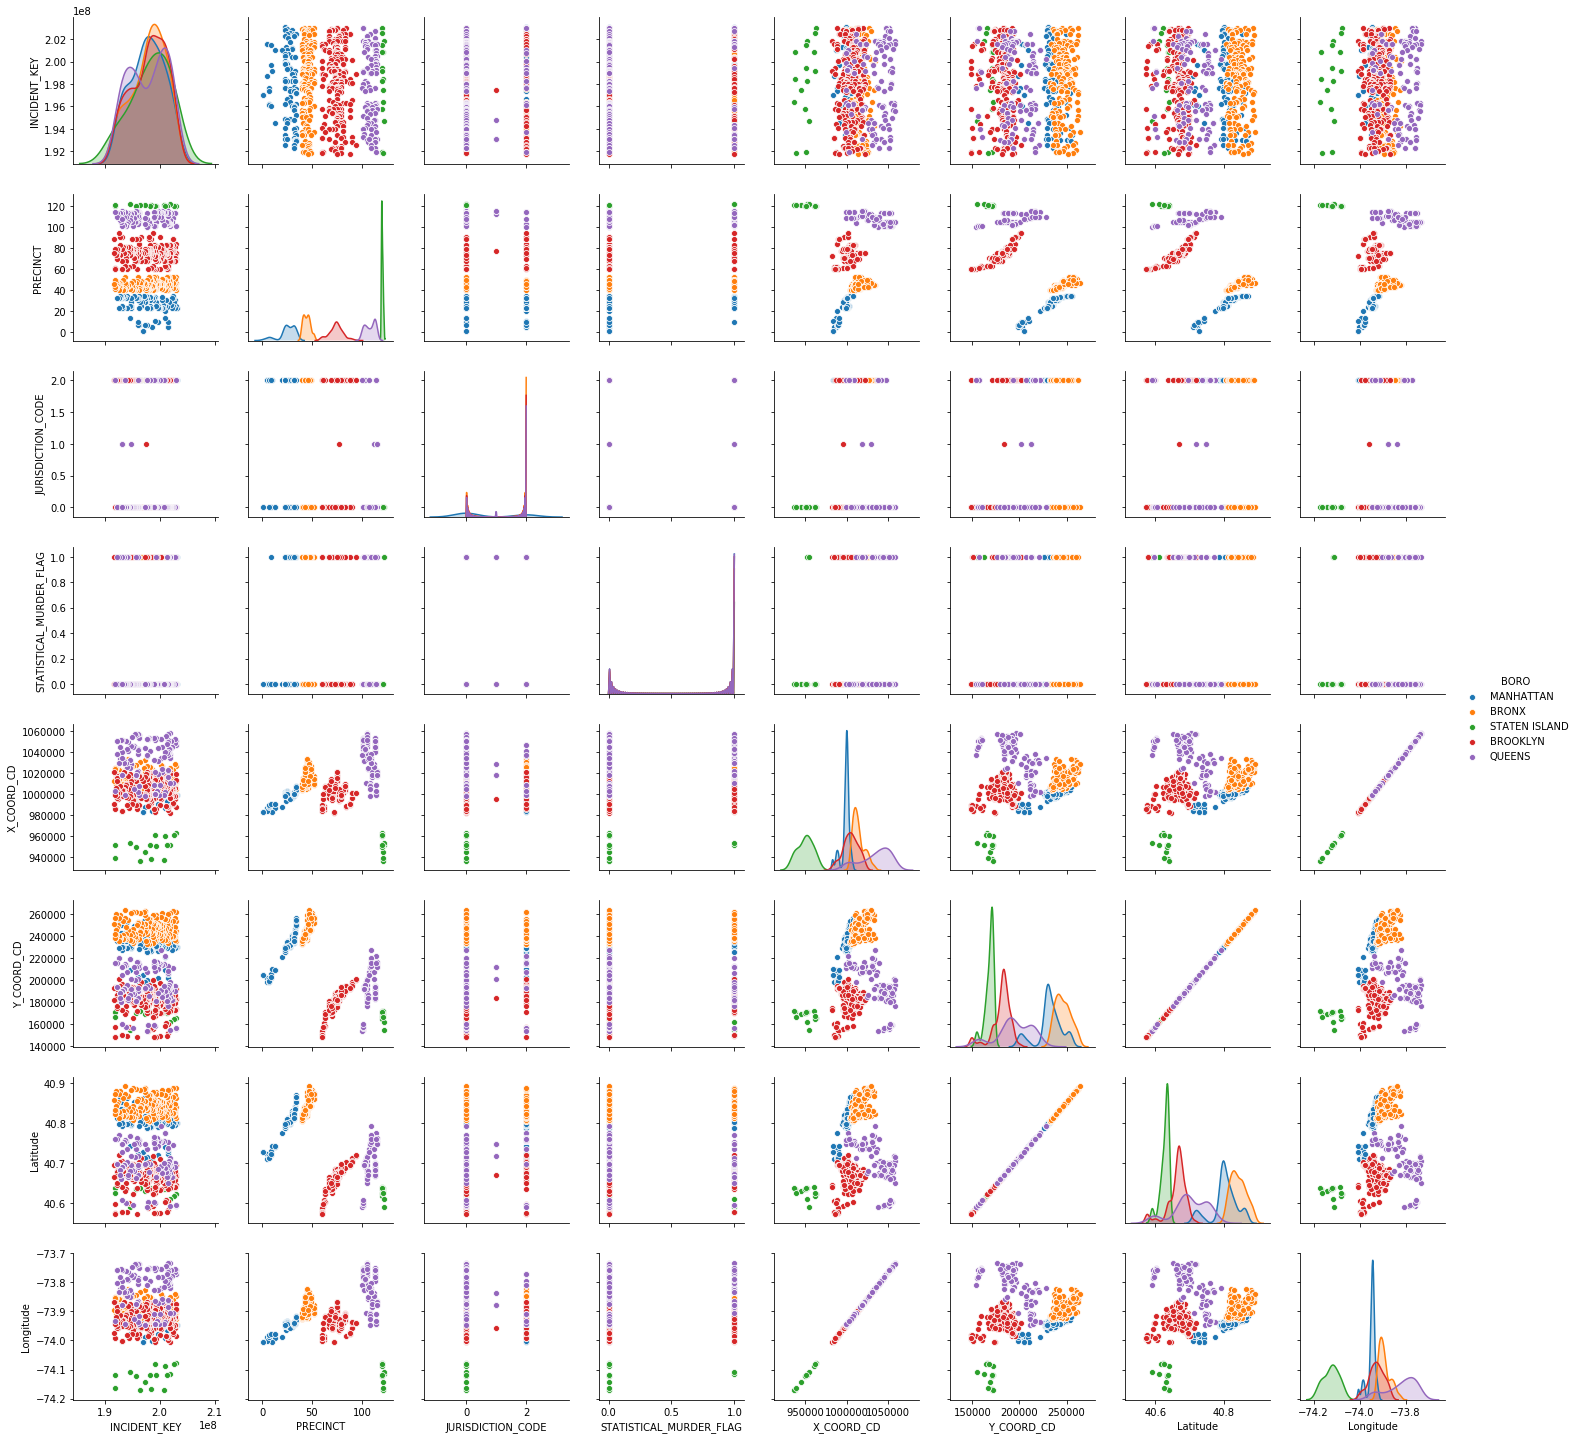

In [122]:
sns.pairplot(shoot, hue = "BORO")